# Classification of Crystal Structure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# connecting kaggle api to notebook
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
#Downloading dataset from Kaggle 
api.dataset_download_files('vinven7/comprehensive-database-of-minerals') 
#Path inside the brackets is — username (of_person_who_published_dataset)/name (of_the_Kaggle_dataset).

In [4]:
# downloading as zipfile and extracting the data
from zipfile import ZipFile
zf = ZipFile('comprehensive-database-of-minerals.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [5]:
df=pd.read_csv('Minerals_Database.csv')
df.head()

,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,0,Abenakiite-(Ce),5.0,4.50,0.0,3.240,3.0,1.580,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,1,Abernathyite,4.0,2.75,3.0,3.446,3.0,1.592,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,2,Abhurite,5.0,2.00,3.0,4.420,3.0,2.085,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
3,3,Abswurmbachite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,550.019900,0.033658,13.563
4,4,Actinolite,2.0,5.50,2.0,1.050,4.0,1.634,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378


In [6]:
df.columns

Index(['Unnamed: 0', 'Name', 'Crystal Structure', 'Mohs Hardness',
       'Diaphaneity', 'Specific Gravity', 'Optical', 'Refractive Index',
       'Dispersion', 'Hydrogen',
       ...
       'Acetate', 'Phosphate', 'Sulphate', 'Carbonate', 'Ammonium',
       'Hydrated Water', 'count', 'Molar Mass', 'Molar Volume',
       'Calculated Density'],
      dtype='object', length=140)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Columns: 140 entries, Unnamed: 0 to Calculated Density
dtypes: float64(138), int64(1), object(1)
memory usage: 3.3+ MB


In [8]:
df.isnull().sum()

Unnamed: 0            0
Name                  0
Crystal Structure     0
Mohs Hardness         0
Diaphaneity           0
Specific Gravity      0
Optical               0
Refractive Index      0
Dispersion            0
Hydrogen              0
Helium                0
Lithium               0
Beryllium             0
Boron                 0
Carbon                0
Nitrogen              0
Oxygen                0
Fluorine              0
Neon                  0
Sodium                0
Magnesium             0
Aluminium             0
Silicon               0
Phosphorus            0
Sulfur                0
Chlorine              0
Argon                 0
Potassium             0
Calcium               0
Scandium              0
                     ..
Nobelium              0
Lawrencium            0
Rutherfordium         0
Dubnium               0
Seaborgium            0
Bohrium               0
Hassium               0
Meitnerium            0
Darmstadtium          0
Roentgenium           0
Copernicium     

In [9]:
df['Crystal Structure'].unique()

array([5., 4., 0., 2., 3., 1., 6.])

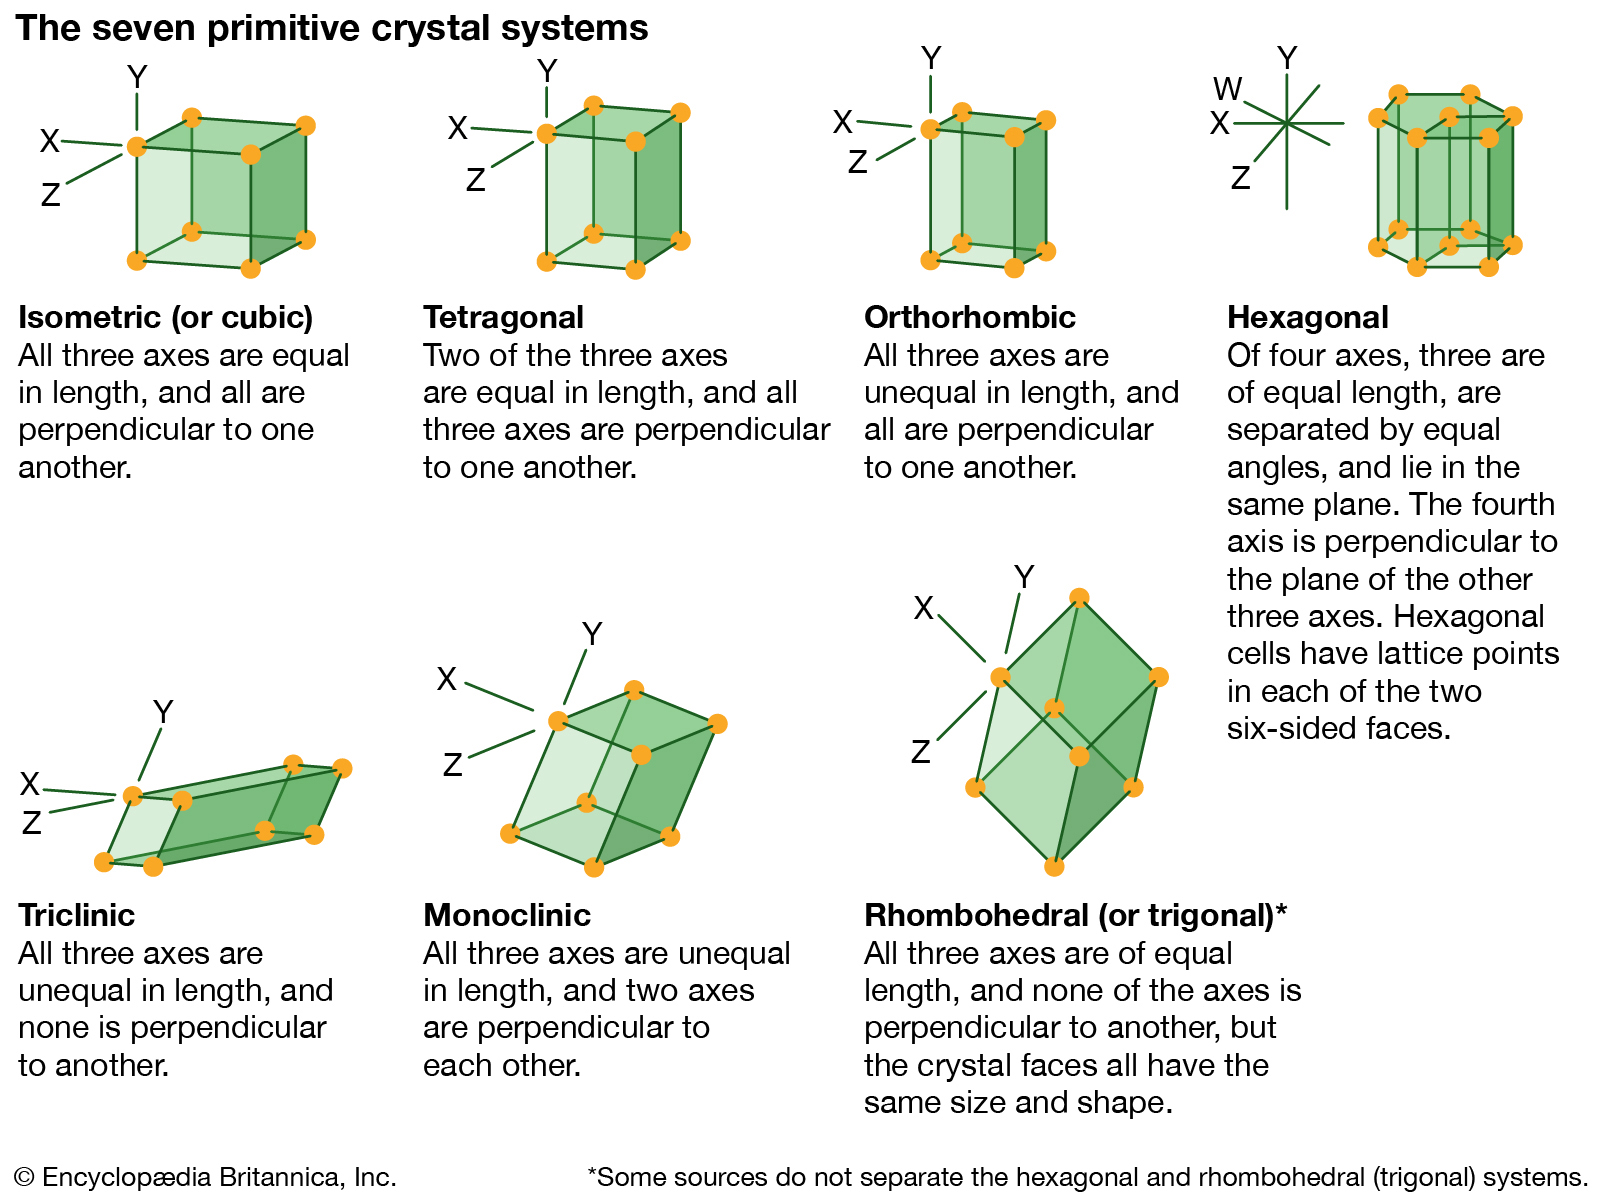

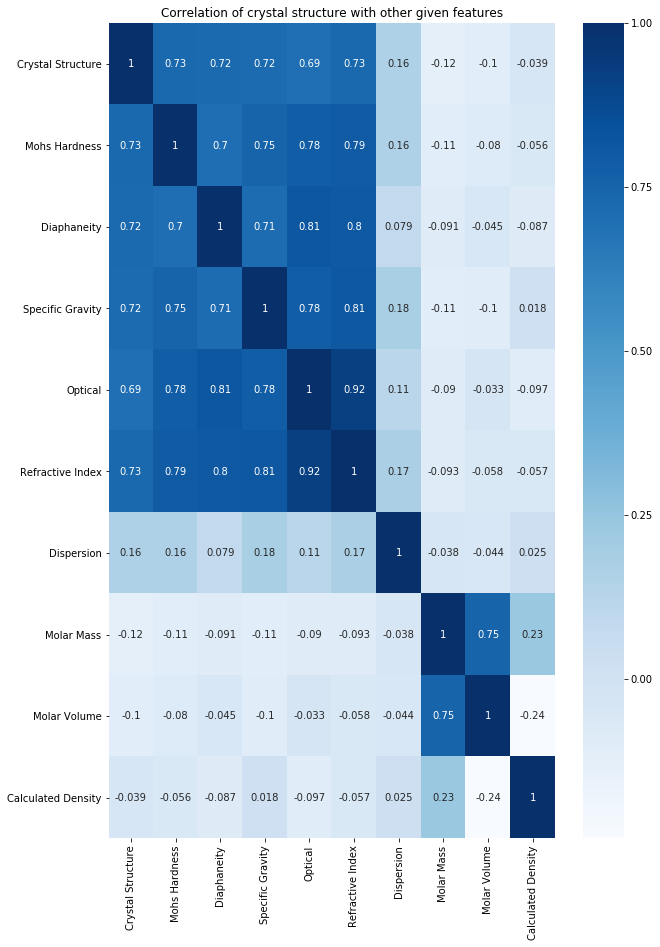

In [10]:
#Heatmap displaying correalation between each attributes
plt.figure(figsize=(10,15))
sns.heatmap(df[['Crystal Structure','Mohs Hardness','Diaphaneity','Specific Gravity','Optical','Refractive Index','Dispersion','Molar Mass','Molar Volume','Calculated Density']].corr(),annot=True,cmap='Blues');
plt.title('Correlation of crystal structure with other given features');
plt.show()

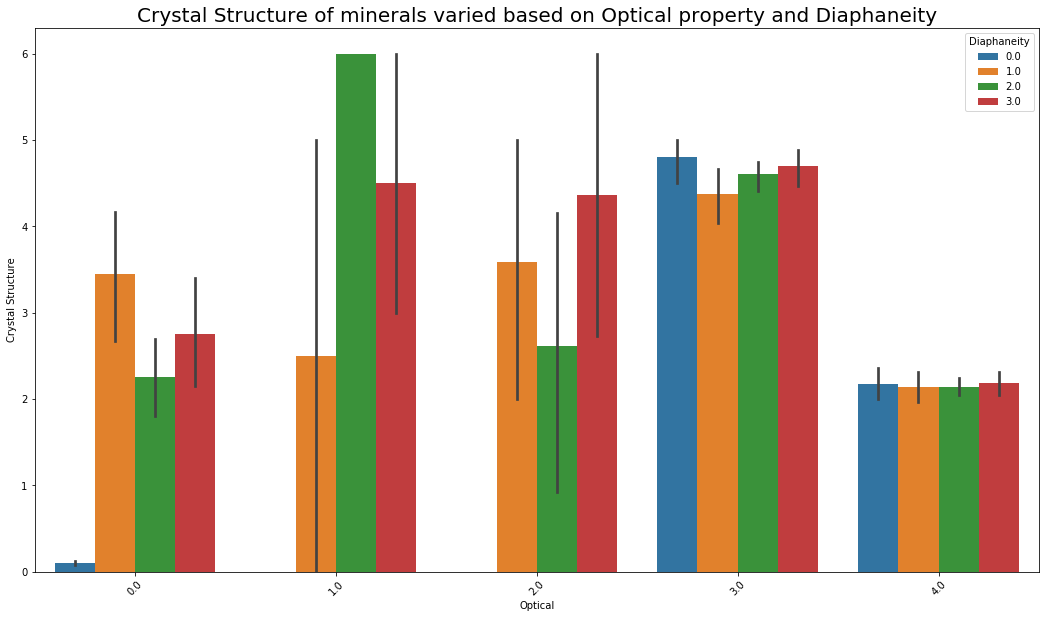

In [11]:
plt.figure(figsize=(18,10))
sns.barplot(x=df['Optical'],y=df['Crystal Structure'],hue=df['Diaphaneity'])
plt.title('Crystal Structure of minerals varied based on Optical property and Diaphaneity',fontdict = {'fontsize' : 20},loc ='center', )
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [12]:
X=df[['Mohs Hardness','Diaphaneity','Specific Gravity','Optical','Refractive Index','Dispersion','Molar Mass','Molar Volume','Calculated Density']]
y=df['Crystal Structure']

### Splitting the dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,stratify=y)


In [14]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


### Building Models

#### KNeighborsClassifier

In [16]:
# Creating instance of KNN
clf=KNN(n_neighbors=10)

#fitting the model
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
#Predicting over the train set and calculating F1
y_predict=clf.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.85553772070626


In [18]:
def Elbow(k):
    test_error=[]
    for i in k:
        clf=KNN(n_neighbors=i)
        clf.fit(X_train,y_train)
        y_test_predict=clf.predict(X_test)
        k=f1_score(y_test_predict,y_test,average='micro')
        error=1-k
        test_error.append(error)
    return test_error

In [19]:
k=range(2,25,2)

In [20]:
test=Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

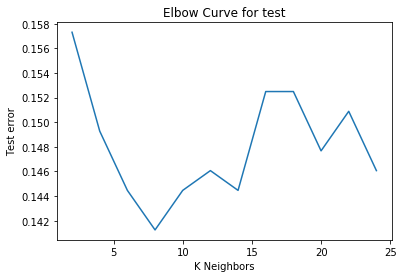

In [21]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [22]:
# Creating instance of KNN
clf1=KNN(n_neighbors=8)

#fitting the model
clf1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [23]:
accuracy=[] # empty list to save the accuracy scores  
#Predicting over the train set and calculating F1
y_predict_knn=clf1.predict(X_test)
accuracy.append(('KNeighborsClassifier',accuracy_score(y_test,y_predict_knn)))
print(accuracy_score(y_test,y_predict_knn))

0.8587479935794543


In [24]:
from sklearn.metrics import classification_report

print("classification_report for KNeighborsClassifier")

print("..."*10)

print(classification_report(y_test, y_predict_knn))

classification_report for KNeighborsClassifier
..............................
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       476
         1.0       0.38      0.29      0.33        17
         2.0       0.53      0.75      0.62        57
         3.0       0.25      0.15      0.19        34
         4.0       0.20      0.09      0.13        11
         5.0       0.47      0.30      0.37        23
         6.0       0.00      0.00      0.00         5

    accuracy                           0.86       623
   macro avg       0.40      0.37      0.37       623
weighted avg       0.84      0.86      0.84       623



#### Support Vector Classifier

In [25]:
from sklearn.svm import SVC

In [26]:
svc= SVC(gamma=0.025, C=3)
svc.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [27]:
y_predict_svc= svc.predict(X_test)


In [28]:
from sklearn.metrics import classification_report

print("classification_report for SVC")

print("..."*10)

print(classification_report(y_test, y_predict_svc));

classification_report for SVC
..............................


C:\Users\rajeshkc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajeshkc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajeshkc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       476
         1.0       0.00      0.00      0.00        17
         2.0       0.52      0.89      0.65        57
         3.0       0.00      0.00      0.00        34
         4.0       0.00      0.00      0.00        11
         5.0       0.46      0.70      0.55        23
         6.0       0.00      0.00      0.00         5

    accuracy                           0.87       623
   macro avg       0.28      0.37      0.31       623
weighted avg       0.81      0.87      0.83       623



In [29]:
accuracy.append(('SupportVectorClassifier', accuracy_score(y_test,y_predict_svc)))
print(accuracy_score(y_test,y_predict_svc))

0.8667736757624398


### DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_predict_dtc = dtc.predict(X_test)


In [33]:
from sklearn.metrics import classification_report

print("classification_report for DTC")

print("..."*10)

print(classification_report(y_test, y_predict_dtc))

classification_report for DTC
..............................
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       476
         1.0       0.17      0.24      0.20        17
         2.0       0.42      0.35      0.38        57
         3.0       0.16      0.15      0.15        34
         4.0       0.36      0.45      0.40        11
         5.0       0.43      0.43      0.43        23
         6.0       0.29      0.40      0.33         5

    accuracy                           0.81       623
   macro avg       0.40      0.43      0.41       623
weighted avg       0.82      0.81      0.81       623



In [34]:
accuracy.append(('DecisionTreeClassifier',accuracy_score(y_test,y_predict_dtc)))
print(accuracy_score(y_test,y_predict_dtc))

0.8138041733547352


### RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc=RandomForestClassifier()

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_predict_rfc=rfc.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

print("classification_report for DTC")

print("..."*10)

print(classification_report(y_test, y_predict_rfc))

classification_report for DTC
..............................
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       476
         1.0       0.33      0.12      0.17        17
         2.0       0.55      0.72      0.62        57
         3.0       0.44      0.24      0.31        34
         4.0       0.25      0.09      0.13        11
         5.0       0.58      0.65      0.61        23
         6.0       0.40      0.40      0.40         5

    accuracy                           0.87       623
   macro avg       0.50      0.46      0.46       623
weighted avg       0.85      0.87      0.86       623



In [40]:
accuracy.append(('RandomForestClassifier',accuracy_score(y_test,y_predict_rfc)))
print(accuracy_score(y_test,y_predict_rfc))

0.8715890850722311


In [41]:
print(accuracy)

[('KNeighborsClassifier', 0.8587479935794543), ('SupportVectorClassifier', 0.8667736757624398), ('DecisionTreeClassifier', 0.8138041733547352), ('RandomForestClassifier', 0.8715890850722311)]


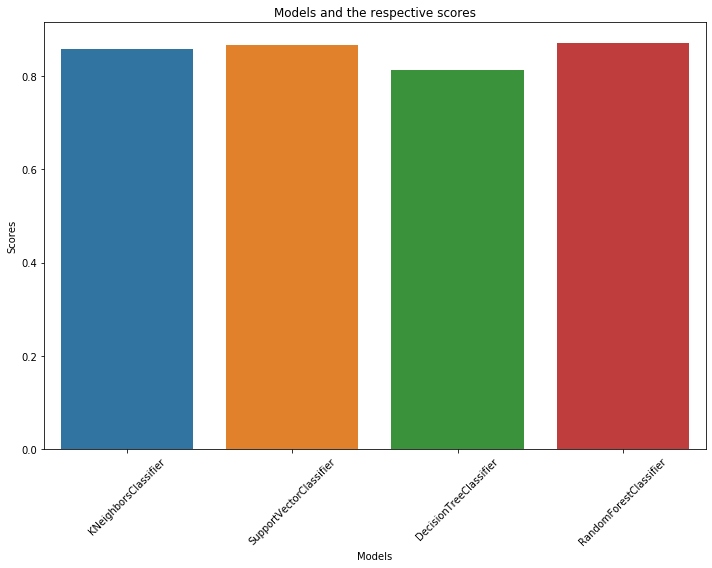

In [42]:
#plotting barplot
df1= pd.DataFrame(accuracy,columns =['Models', 'Scores']) 
plt.figure(figsize=(10,8))
sns.barplot(x=df1['Models'],y=df1['Scores'])
plt.xticks(rotation=45)

plt.title('Models and the respective scores' )
plt.tight_layout()
plt.show()


In [43]:
df[['Crystal Structure','Mohs Hardness','Diaphaneity','Specific Gravity','Optical','Refractive Index','Dispersion','Molar Mass','Molar Volume','Calculated Density']].to_csv('classification_crystal_structure')

In [44]:
df4=pd.read_csv('classification_crystal_structure')
df4.columns

Index(['Unnamed: 0', 'Crystal Structure', 'Mohs Hardness', 'Diaphaneity',
       'Specific Gravity', 'Optical', 'Refractive Index', 'Dispersion',
       'Molar Mass', 'Molar Volume', 'Calculated Density'],
      dtype='object')

In [45]:
import pickle 
# Saving model to disk
pickle.dump(rfc, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))